# Preprocessing

### Load all climate data (Precip & Soil Moisture) station F102 - F108

In [190]:
%run -i function.py
#change

In [191]:

df_station = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                           engine="openpyxl", sheet_name=None, skiprows=1,)

# Print the name of each sheets


5 Stations with different soil profiles and slope.


## Load all the precipitation in the stations

In [192]:
station_name = list(df_station.keys())[:5]
station_name


['F102', 'F106', 'F107', 'F108', 'F110']

## Precipitation of all the stations


In [193]:
precipitation = df_station['F102'].iloc[:, :2].set_index('Date')

for i in station_name:
    precipitation = precipitation.merge(df_station[i].iloc[:, :2].set_index(
        'Date').rename(columns={'mm': i}), left_index=True, right_index=True)
precipitation = precipitation.drop(columns='mm')

precipitation = precipitation.replace([-996,-999], np.nan)
precipitation.describe()


F102         F106         F107         F108         F110
count  5616.000000  5648.000000  3981.000000  5661.000000  5642.000000
mean      2.125741     2.066737     2.039206     2.019604     2.144523
std       7.847348     7.646972     7.632055     7.489740     8.103167
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000     0.000000
max     142.750000   171.450000   170.940000   160.270000   171.450000

In [194]:
# Load the excel
data = pd.read_excel(os.getcwd()+"/Inputs/Physiography Data.xlsx",
                     engine="openpyxl", sheet_name=None, )
data.keys()


dict_keys(['F102', 'F106', 'F107', 'F108', 'F110', 'MESONET HINT_TEMP', 'Discharge', 'Soils_Slopes'])

<AxesSubplot:ylabel='Date'>

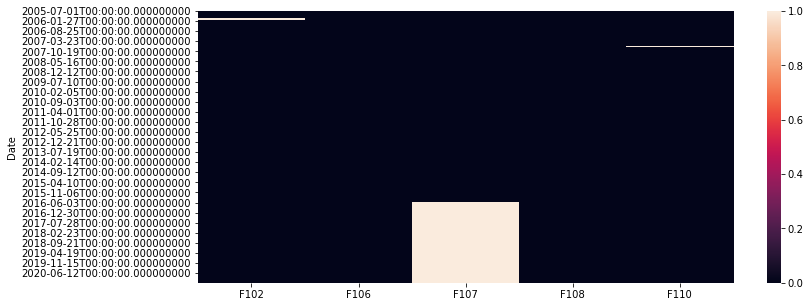

In [195]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(precipitation.isna())


Micronet Stations  Slope %       Texture  No. Layers  Max Depth (mm)
0              f102      5.9  LFS-FSL-SL-L           4            1829
1              f106      5.5      FSL-SICL           2            1727
2              f107      0.5      FSL-SICL           2            1727
3              f108      3.7      FSL-SICL           2            1727
4              f110      2.8      FSL-SICL           2            1727

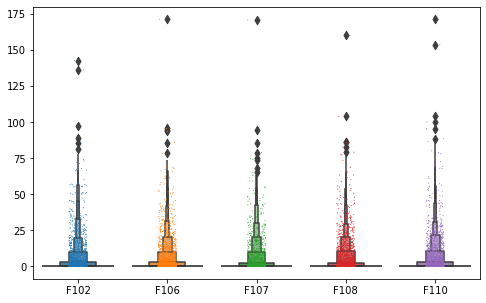

In [196]:
fig,ax = plt.subplots(figsize=(8,5))
sns.stripplot(data=precipitation, size= 1)
sns.boxenplot(data=precipitation)
data['Soils_Slopes']


<AxesSubplot:xlabel='Date'>

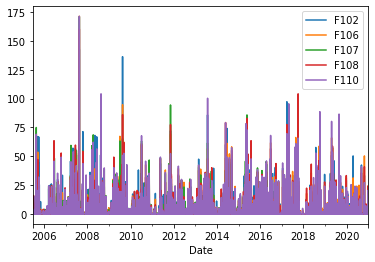

In [197]:
precipitation.plot()

In [198]:
precipitation.describe()


F102         F106         F107         F108         F110
count  5616.000000  5648.000000  3981.000000  5661.000000  5642.000000
mean      2.125741     2.066737     2.039206     2.019604     2.144523
std       7.847348     7.646972     7.632055     7.489740     8.103167
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000     0.000000     0.000000
75%       0.000000     0.000000     0.000000     0.000000     0.000000
max     142.750000   171.450000   170.940000   160.270000   171.450000

Stations with the least missing precipitaion values are preferred for analysis listed below in descending order
- F106
- F110
- F102
- F107

Check the correlation between the precipitation at the different station 

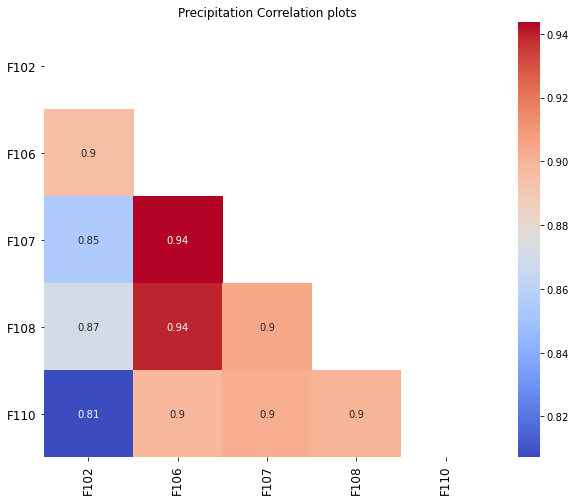

In [199]:
corr_plot(precipitation, 'Precipitation Correlation plots')


We choose the station with the most complete precipitation "F108".
<mark>F108</mark> has a high correlation with <mark>F106</mark> station that happens to be the next complete.
They both have the same soil property but different slopes


In [200]:
data["Soils_Slopes"]


Micronet Stations  Slope %       Texture  No. Layers  Max Depth (mm)
0              f102      5.9  LFS-FSL-SL-L           4            1829
1              f106      5.5      FSL-SICL           2            1727
2              f107      0.5      FSL-SICL           2            1727
3              f108      3.7      FSL-SICL           2            1727
4              f110      2.8      FSL-SICL           2            1727

## Load the Temperature data

We have a single temperature data for all the stations located in sheetnamae <mark> MESONET HINT_TEMP</mark>

In [201]:
# Obtain the Mesonet Temperature Min and Max temperature
Temperature = data["MESONET HINT_TEMP"].set_index('Date')
#Temperature.rename(columns={"TMAX (C)" : "TMAX ", 'TMIN (C)': "TMAX"})

# Merge the temperature and precipitation for the F108 station
df_F108 = Temperature.merge(precipitation['F108'], how='inner', on='Date')
df_F108 = df_F108.rename(columns={'F108': "PRCP (mm)"})


In [202]:
df_F108["CMS"] = data["Discharge"].set_index('Date').loc['2005-07-01':]

In [203]:
status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663              2         0.0%
CMS              5663              0         0.0%


In [204]:
# replace all odd values due to instrument reading and linear interpolate
df_F108 = df_F108.replace(-571.105400, np.nan)
df_F108 = df_F108.interpolate(method='linear', limit_direction='both')
status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663              0         0.0%
CMS              5663              0         0.0%


## Merge the soil properties, temperature and precipitation 

In [205]:
df_F108 = df_F108.merge(df_station['F108'].drop(columns='mm'),
                        how='inner', on='Date')

# set the date as the index of the dataframe
df_F108 = df_F108.set_index('Date')

# Rename the soil columns
df_F108 = df_F108.rename(columns={"5 cm": "SM 5 (cm)",
                                  "25 cm": "SM 25 (cm)",
                                  "45 cm": "SM 45 (cm)"})


### Deal with the missing values.

In [206]:
# replace all the -998  adn -996 with np.nan
df_F108 = df_F108.replace([-998, -996], np.nan)

status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5663              0         0.0%
TMIN (C)         5663              0         0.0%
PRCP (mm)        5663              0         0.0%
CMS              5663              0         0.0%
SM 5 (cm)        5663             88         1.6%
SM 25 (cm)       5663             88         1.6%
SM 45 (cm)       5663             88         1.6%


<AxesSubplot:ylabel='Date'>

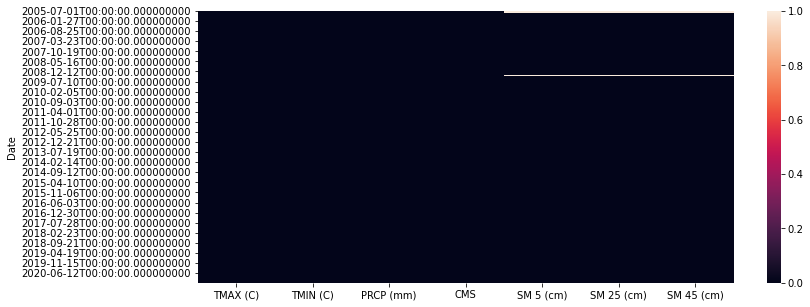

In [207]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df_F108.isna())


In [208]:
display_side_by_side([sequence_of_missing_values(df_F108, 'SM 5 (cm)'),
                     sequence_of_missing_values(df_F108, 'SM 25 (cm)'), sequence_of_missing_values(df_F108, 'SM 45 (cm)')],
                     ['5cm', '25cm', '45cm']
                     )


Drop the first 56 rows till 2005-08-26 and linear interpolate the dataframe

In [209]:
df_F108 = df_F108.loc['2005-08-26':].interpolate(
    method='linear', limit_direction='both')
status(df_F108)


Features     Observations    No of missing   % Missing
----------  --------------  ---------------  ------------
TMAX (C)         5607              0         0.0%
TMIN (C)         5607              0         0.0%
PRCP (mm)        5607              0         0.0%
CMS              5607              0         0.0%
SM 5 (cm)        5607              0         0.0%
SM 25 (cm)       5607              0         0.0%
SM 45 (cm)       5607              0         0.0%


# Feature Engineering

- create median and mean precipitations weekly and yearly frequency. 
- check the correlation between features on both time format.
- load the yearly yeild
- Split the data into train and test
- Create the pipeline no tuning yet
-- XGBoost
-- Catboost
-- Random Forest
-- ExtraTree

## Correlation plots

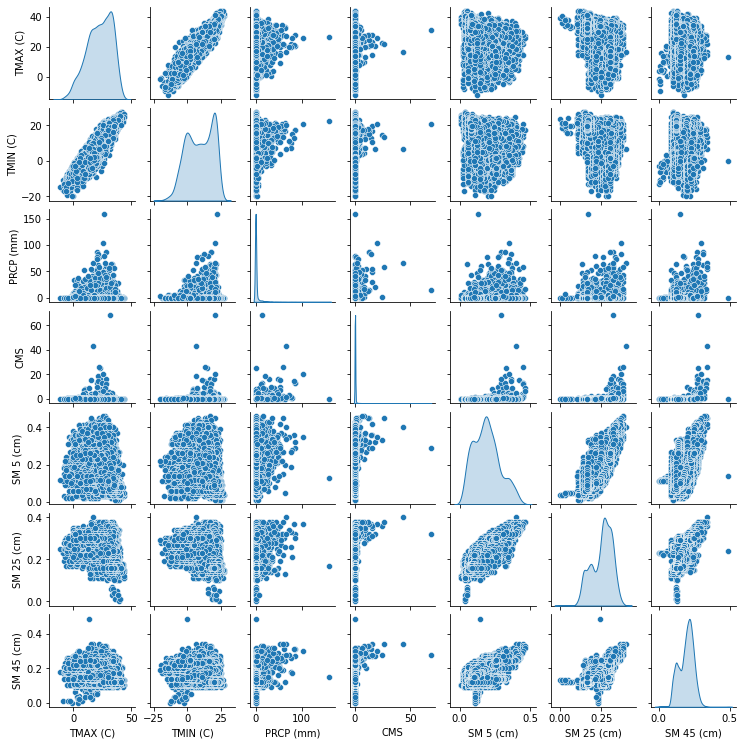

In [210]:
sns.pairplot(df_F108, diag_kind='kde', height=1.5)


### resample to weekly values and check correlation


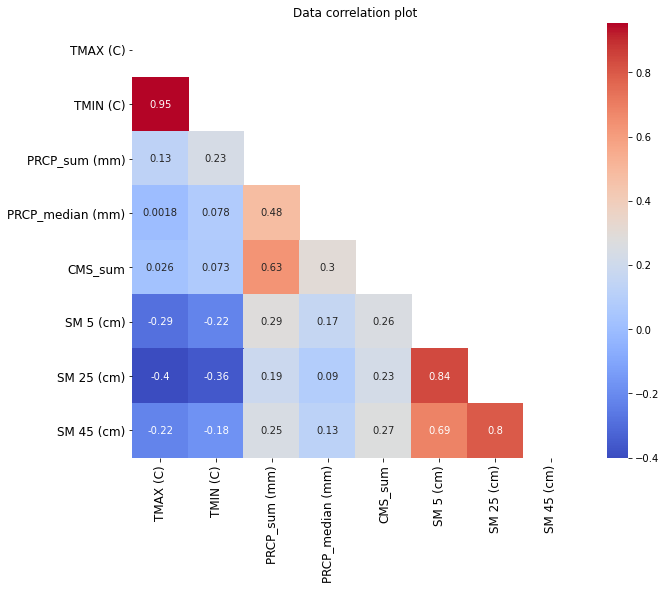

In [211]:
# Resample the temperature
resampled = df_F108[['TMAX (C)', "TMIN (C)"]].resample('W').median()
# Resample the Precipitation sum and median
resampled["PRCP_sum (mm)"] = df_F108["PRCP (mm)"].resample('W').sum()
resampled["PRCP_median (mm)"] = df_F108["PRCP (mm)"].resample('W').median()
# Resample the discharge sum
resampled["CMS_sum"] = df_F108["CMS"].resample('W').sum()
# Resample the SM
resampled_SM = df_F108.iloc[:, 4:].resample('W').mean()
# The transformed precipitation mean and median

df_F108_resampled = resampled.merge(resampled_SM, on='Date', how="inner")


corr_plot(df_F108_resampled, 'Data correlation plot')


The pearson correlation shows that the resampled weekly mean PRCP (mm) has a higher correlation with other features than the median

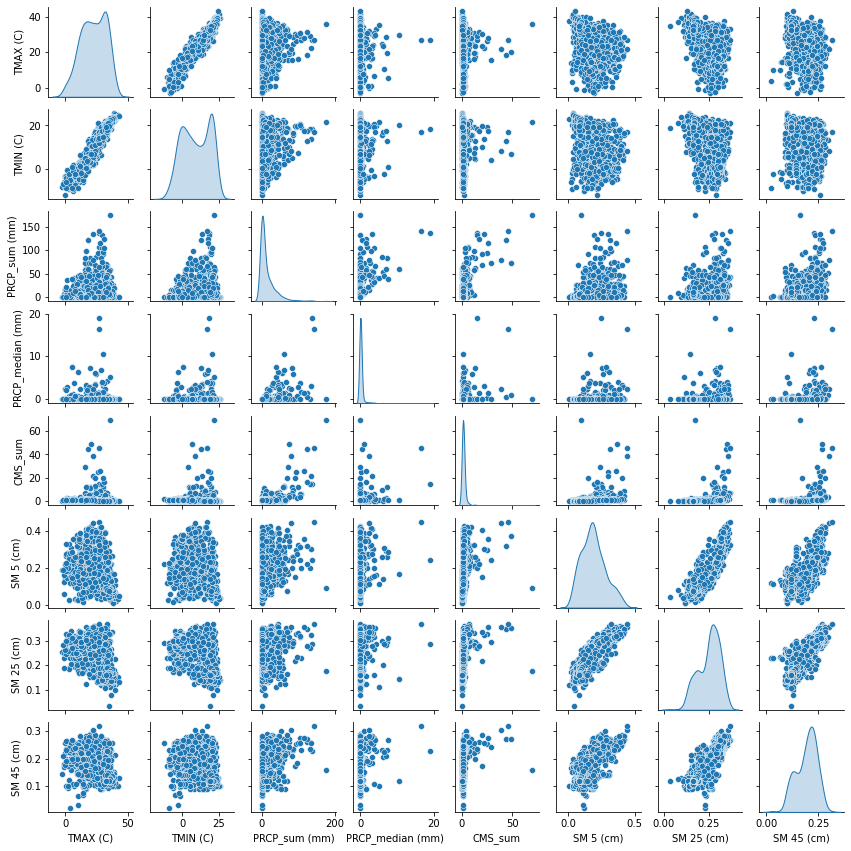

In [157]:
sns.pairplot(df_F108_resampled, diag_kind='kde', height=1.5)


# df_AI

In [212]:
df_AI = df_F108_resampled.drop(columns=["PRCP_median (mm)"])

df_AI = df_AI.rename(columns={"PRCP_sum (mm)": "$P [mm]$",
                              "TMAX (C)": "$T_{max}$ [$^oC$]",
                              "TMIN (C)": '$T_{min}$ [$^oC$]',
                              "SM 5 (cm)": "$SM_{5} [cm]$",
                              "SM 25 (cm)": "$SM_{25} [cm]$",
                              "SM 45 (cm)": "$SM_{45} [cm]$",
                              "CMS_sum": "$Dis [CMS]$"})

#corr_plot(df_AI, 'DF_AI correlation plot')


In [213]:
df_AI['Month'] = df_AI.index.month

# Precipitation Lags
df_AI['$P^{lag1} [mm]$'] = df_AI["$P [mm]$"].shift(1)
df_AI['$P^{lag2} [mm]$'] = df_AI["$P [mm]$"].shift(2)


# Temperature Lags
#df_AI['$T_{max}^{lag1}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(1)
#df_AI['$T_{max}^{lag2}$ [$^oC$]'] = df_AI['$T_{max}$ [$^oC$]'].shift(2)

#df_AI['$T_{min}^{lag1}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(1)
#df_AI['$T_{min}^{lag2}$ [$^oC$]'] = df_AI['$T_{min}$ [$^oC$]'].shift(2)

# Soil Moisture Lags

#df_AI["$SM_{5}^{lag1}[cm]$"] = df_AI["$SM_{5} [cm]$"].shift(1)
#df_AI["$SM_{5}^{lag2}[cm]$"] = df_AI["$SM_{5} [cm]$"].shift(2)


In [214]:
month = df_AI.loc[:, df_AI.columns.str.startswith('M')]
prcp = df_AI.loc[:, df_AI.columns.str.startswith('$P')]
temp = df_AI.loc[:, df_AI.columns.str.startswith('$T')]
ds = df_AI.loc[:, df_AI.columns.str.startswith('$D')]
sm = df_AI.loc[:, df_AI.columns.str.startswith('$S')]


df_AI = month.merge(temp, on='Date').merge(prcp, on='Date').merge(ds, on="Date").merge(sm, on="Date").dropna()


In [215]:
df_AI

Month  $T_{max}$ [$^oC$]  $T_{min}$ [$^oC$]  $P [mm]$  \
Date                                                                
2005-09-11      9          32.777450          18.049820      4.06   
2005-09-18      9          29.988589          18.149818     73.15   
2005-09-25      9          33.788551          18.710924      0.00   
2005-10-02     10          28.399716          13.338755     29.72   
2005-10-09     10          23.860872          10.311008     24.64   
...           ...                ...                ...       ...   
2020-12-06     12          12.549874          -2.299977      0.76   
2020-12-13     12          18.377594          -1.299987      3.30   
2020-12-20     12           7.838811          -2.638863     12.70   
2020-12-27     12          16.827610           0.061110      0.00   
2021-01-03      1           5.444390           0.497217     39.12   

            $P^{lag1} [mm]$  $P^{lag2} [mm]$  $Dis [CMS]$  $SM_{5} [cm]$  \
Date                                                                       
2005-09-11             0.00            41.40     0.950597       0.101429   
2005-09-18             4.06             0.00     4.648275       0.167143   
2005-09-25            73.15             4.06     0.739196       0.127143   
2005-10-02             0.00            73.15     2.979141       0.121429   
2005-10-09            29.72             0.00     1.919306       0.171429   
...                     ...              ...          ...            ...   
2020-12-06             6.09             8.64     0.947484       0.240000   
2020-12-13             0.76             6.09     0.953710       0.230000   
2020-12-20             3.30             0.76     1.142754       0.260000   
2020-12-27            12.70             3.30     0.918901       0.260000   
2021-01-03             0.00            12.70     1.118982       0.287500   

            $SM_{25} [cm]$  $SM_{45} [cm]$  
Date                                        
2005-09-11        0.252857        0.214286  
2005-09-18        0.277143        0.225714  
2005-09-25        0.272857        0.222857  
2005-10-02        0.241429        0.205714  
2005-10-09        0.270000        0.200000  
...                    ...             ...  
2020-12-06        0.295714        0.220000  
2020-12-13        0.290000        0.220000  
2020-12-20        0.298571        0.237143  
2020-12-27        0.304286        0.244286  
2021-01-03        0.312500        0.265000  

[800 rows x 10 columns]

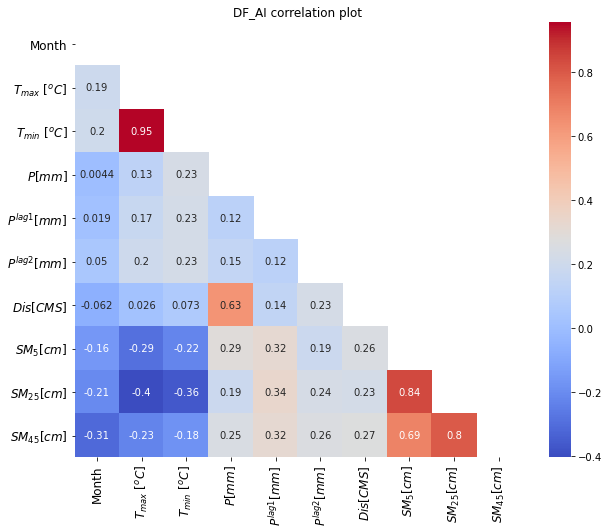

In [216]:
corr_plot(df_AI, 'DF_AI correlation plot')


## Build Model Pipeline

# Predicting soil moisture at 5 cm

In [219]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -3].values # SM 5cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.10, shuffle = False)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [220]:
holdem = results(X_train, y_train, X_test, y_test, pipeliner)


+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.93   | 0.02 |
|   XGBoost    |   1.0    | 0.0  |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.49   | 0.07 |
|   XGBoost    |   0.57   | 0.06 |
|  ExtraTree   |   0.49   | 0.07 |
+--------------+----------+------+


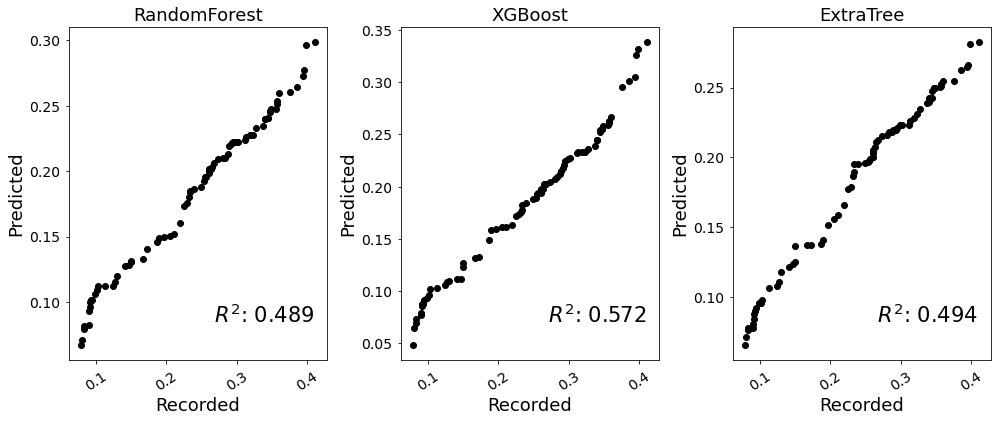

In [221]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


 Randomforest gives the best results for the test result although performs the least on training 
 while the RMSE is equal for both the XGBoost and the Extratree

# Predicting soil moisture at 25 cm

In [67]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -2].values # SM 25cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [68]:

#################################################################################################
#################################################################################################

def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(np.sqrt(mean_squared_error(y, model.predict(x))), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            #x_t[i+1][-2] = history[i]
            #x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results


#################################################################################################
#################################################################################################



In [69]:
holdem = results(X_train, y_train, X_test, y_test, pipeliner)

+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.95   | 0.01 |
|   XGBoost    |   0.84   | 0.02 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.94   | 0.01 |
|   XGBoost    |   0.94   | 0.01 |
|  ExtraTree   |   0.94   | 0.02 |
+--------------+----------+------+


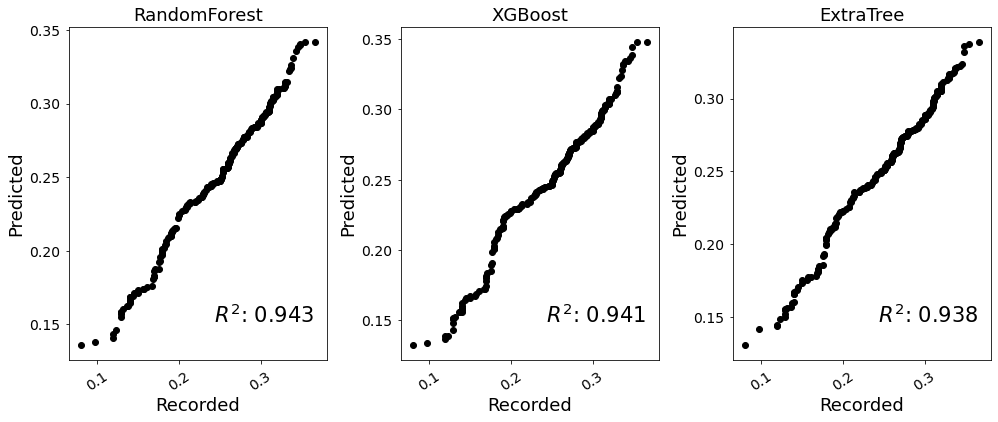

In [70]:

fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


# Predicting soil moisture at 45 cm

In [71]:
X = df_AI.iloc[:, :-3].values
y = df_AI.iloc[:, -1].values # SM 45cm


X_train, X_test, y_train, y_test = train_test_split( X, 
                                                    y.ravel(),
                                                     test_size=0.3)
                                                     

pipeline_RF = Pipeline([('RandomForest', RandomForestRegressor())])
pipeline_XGB = Pipeline([('XGBoost', XGBRegressor())])
pipeline_ExTree = Pipeline([('ExtraTree', ExtraTreesRegressor())])
pipeliner = [pipeline_RF, pipeline_XGB, pipeline_ExTree]


#model = pipeline_RF.fit(X_train, y_train)


In [72]:

#################################################################################################
#################################################################################################

def results(x, y, x_t, y_t, pipelines):
    table = PrettyTable()

    # Fit the pipelines
    [pipe.fit(x, y) for pipe in pipelines]

    pipe_dict = {0: 'RandomForest', 1: 'XGBoost', 2: 'ExtraTree'}

    results = [[pipe_dict[i],
                np.round(r2_score(y, model.predict(x)), decimals=2),
                np.round(np.sqrt(mean_squared_error(y, model.predict(x))), decimals=2)]
               for i, model in enumerate(pipelines)]
    table.title = 'Training set score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']
    table.add_rows(results)
    print(table)

    table = PrettyTable()

    #################################################################################################
    # Make predictions on testing data and test model accuracy
    #################################################################################################
    results2 = []
    model_results = {}
    i = 0
    count = 0
    for model in pipelines:
        history = np.empty(len(x_t))
        test_X = x_t[0].reshape(1, -1)
        history[0] = model.predict(test_X)

        for i in range(len(x_t)):

            #x_t[i+1][-2] = history[i]
            #x_t[i+1][-1] = x_t[i][-2]

            test_X = x_t[i+1].reshape(1, -1)
            history[i+1] = model.predict(test_X)
            i = i+1
            if i == (len(x_t)-1):
                break
        results2.append([model.steps[0][0],
                         np.round(
                             r2_score(np.sort(y_t), np.sort(history)), decimals=2),
                         np.round(np.sqrt(mean_squared_error(np.sort(y_t), np.sort(history))), decimals=2)])
        model_results[model.steps[0][0]] = history
        count = count + 1

    table.title = 'Test set Score'
    table.field_names = ['Algorithm', 'R-square', 'RMSE']

    table.add_rows(results2)

    print(table)

    return model_results




In [73]:
#################################################################################################
#################################################################################################

holdem = results(X_train, y_train, X_test, y_test, pipeliner)



+--------------------------------+
|       Training set score       |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.94   | 0.01 |
|   XGBoost    |   0.82   | 0.02 |
|  ExtraTree   |   1.0    | 0.0  |
+--------------+----------+------+
+--------------------------------+
|         Test set Score         |
+--------------+----------+------+
|  Algorithm   | R-square | RMSE |
+--------------+----------+------+
| RandomForest |   0.94   | 0.01 |
|   XGBoost    |   0.93   | 0.01 |
|  ExtraTree   |   0.91   | 0.01 |
+--------------+----------+------+


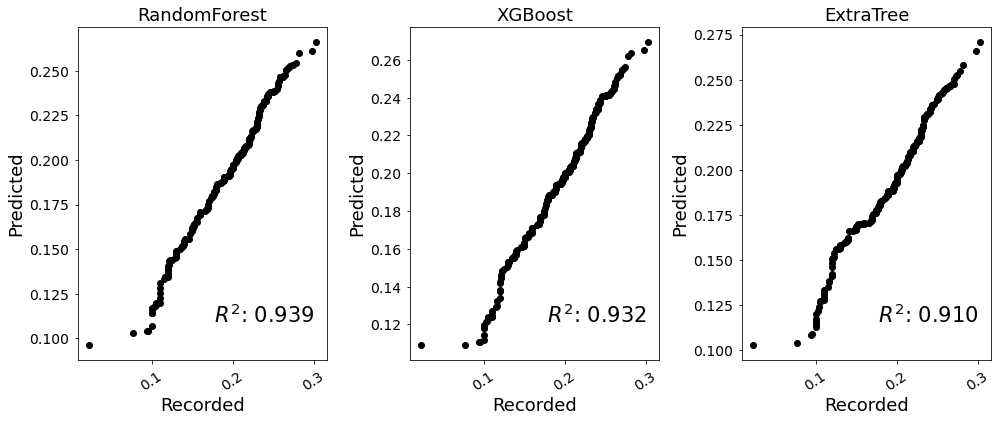

In [74]:
#################################################################################################
#################################################################################################

fig, ax = plt.subplots(1, 3, figsize=(14, 6))
# ###################################################################################################

for count, model_name in enumerate(holdem):

    ax[count].scatter(np.sort(y_test), np.sort(holdem[model_name]),
                      marker='o', color='black')

    RSQ = np.round((r2_score(np.sort(y_test), np.sort(holdem[model_name]))), 3)

    ax[count].text(0.95, 0.1, ("$R^2$: %0.03f" % RSQ),
                   verticalalignment='bottom', horizontalalignment='right',
                   transform=ax[count].transAxes,
                   color='black', fontsize=21)

    ax[count].set_xlabel('Recorded', fontsize=18)
    ax[count].tick_params(axis="x", labelsize=14, rotation=34)
    ax[count].xaxis.set_tick_params(pad=5)
    ax[count].set_ylabel('Predicted', fontsize=18)
    ax[count].tick_params(axis="y", labelsize=14)
    ax[count].yaxis.set_tick_params(pad=5)
    ax[count].set_title(model_name, size=18)

    plt.tight_layout(pad=1.2)

plt.show()


## Shapley Analysis

In [75]:
current_directory = os.getcwd()
path_to_save = current_directory+r'/F108'
os.makedirs(path_to_save, exist_ok=True)

In [76]:
Features = list(df_AI.iloc[:, :-3].columns)
Features 

['Month',
 '$T_{max}$ [$^oC$]',
 '$T_{min}$ [$^oC$]',
 '$P [mm]$',
 '$P^{lag1} [mm]$',
 '$P^{lag2} [mm]$',
 '$Dis [CMS]$']

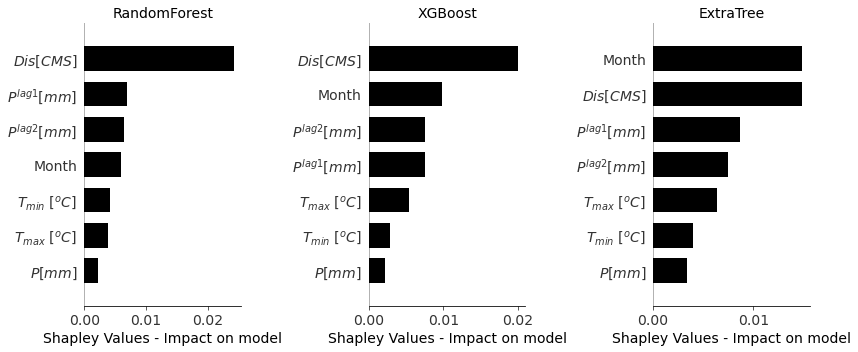

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True, figsize=(32, 5))
gs = gridspec.GridSpec(1, 3)
keep = {}
for count, model in enumerate(pipeliner):
    Modeled = model[0].fit(X, y.ravel())
    explainer = shap.TreeExplainer(Modeled)
    shap_values = explainer.shap_values(X)
    ax = fig.add_subplot(gs[0, count])
    shap.summary_plot(shap_values, X, Features, show=False,
                      plot_type="bar", color="black", plot_size=(12, 5))
    plt.xlabel('Shapley Values - Impact on model', fontsize=14)
    plt.tick_params(labelsize=14)
    # plt.ylabel(labelsize=16)
    plt.tight_layout(pad=1.2)
    plt.title(model.steps[0][0], fontsize=14)
    keep[model.steps[0][0]] = shap_values
    fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.savefig(path_to_save+r'/Histogram-importance.jpg',
            format='jpeg', dpi=300, bbox_inches='tight')
plt.show()


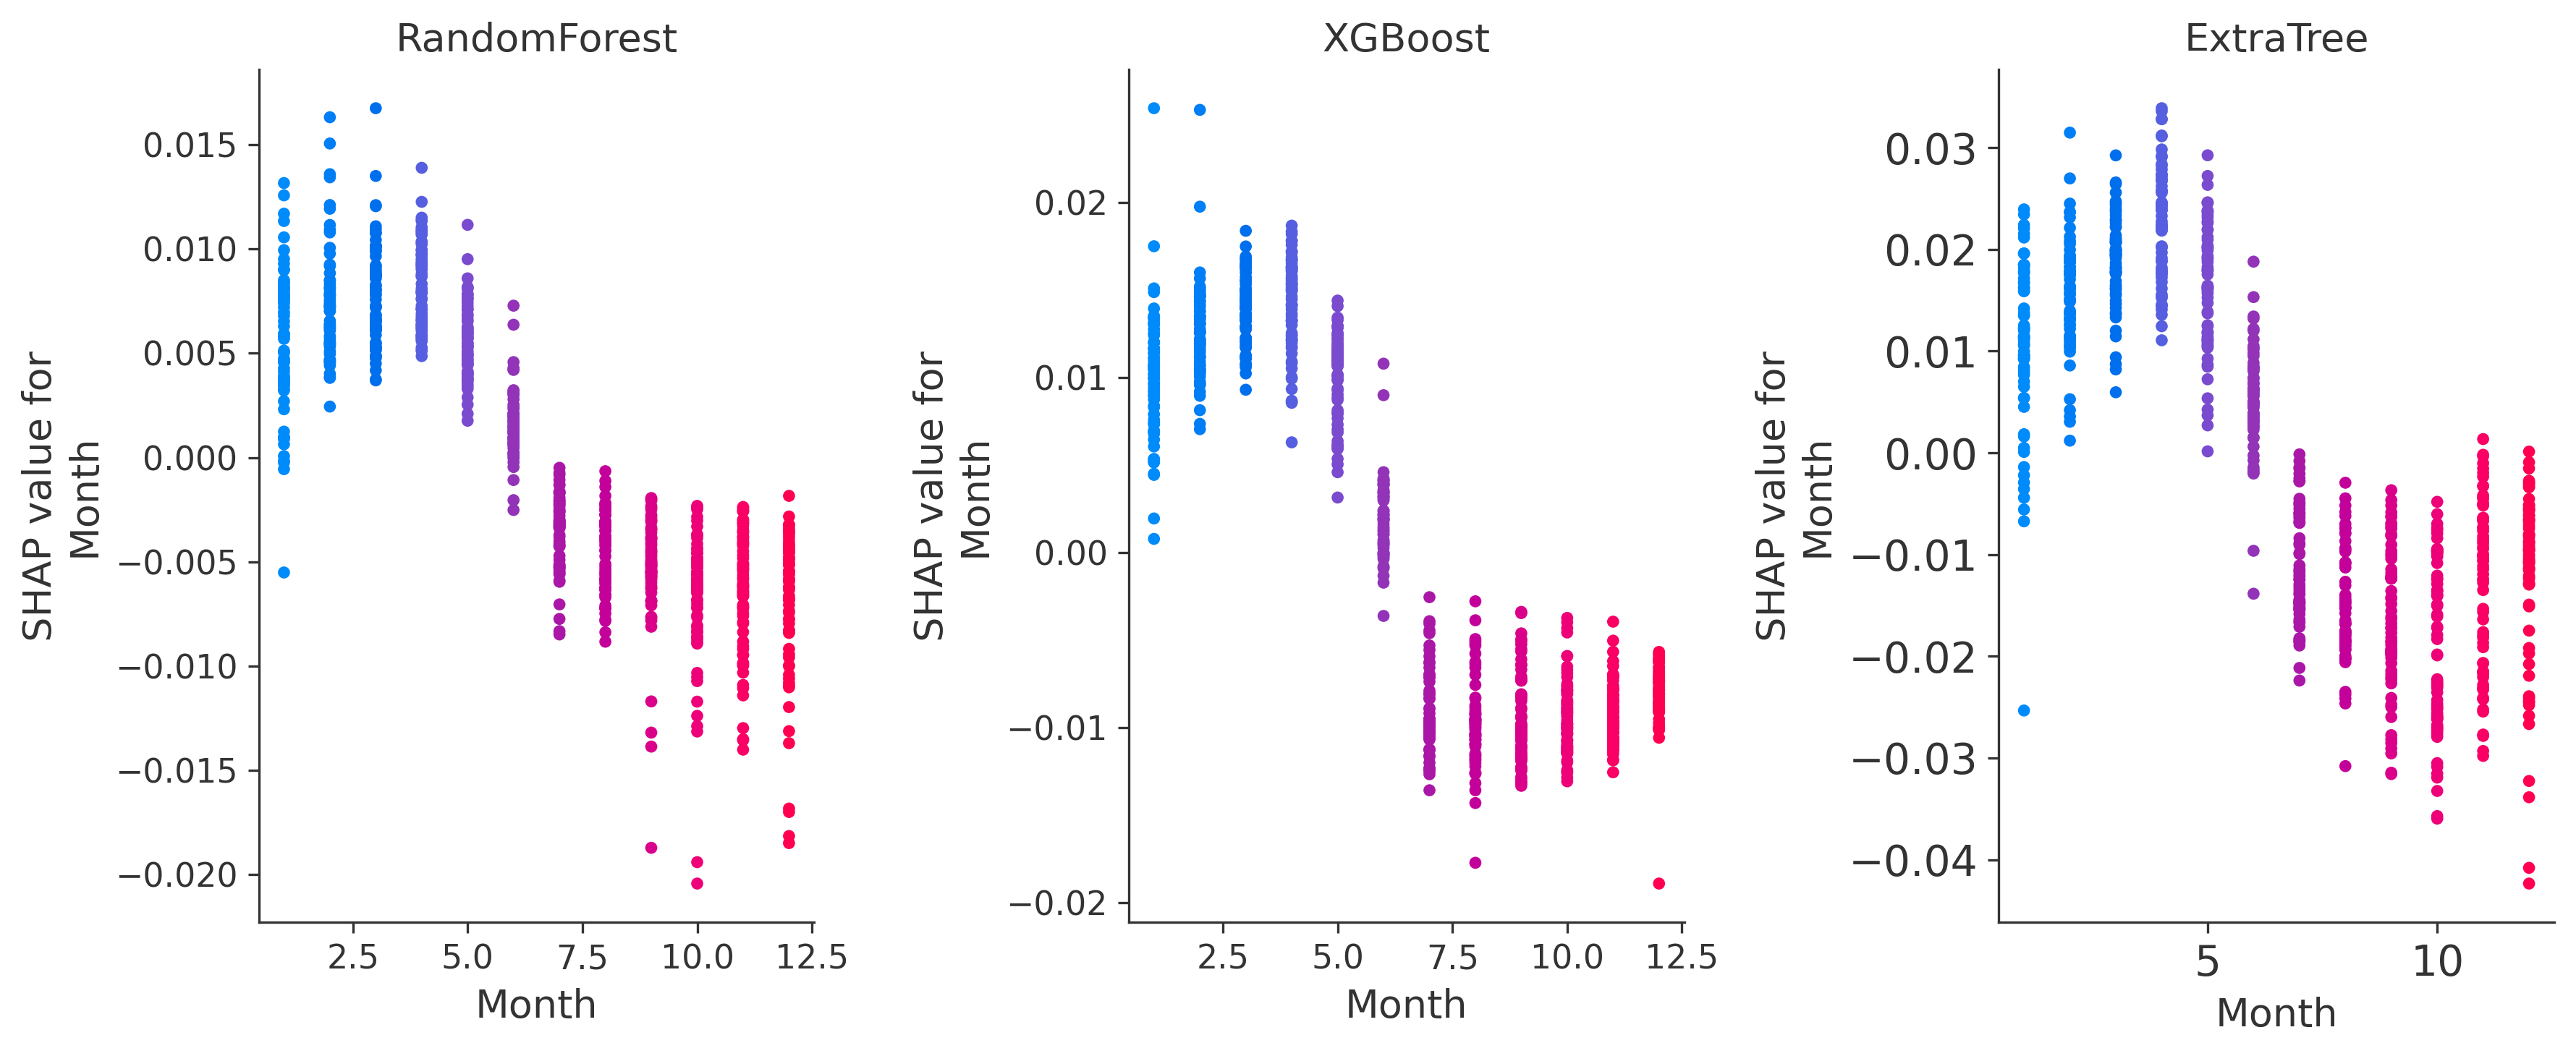

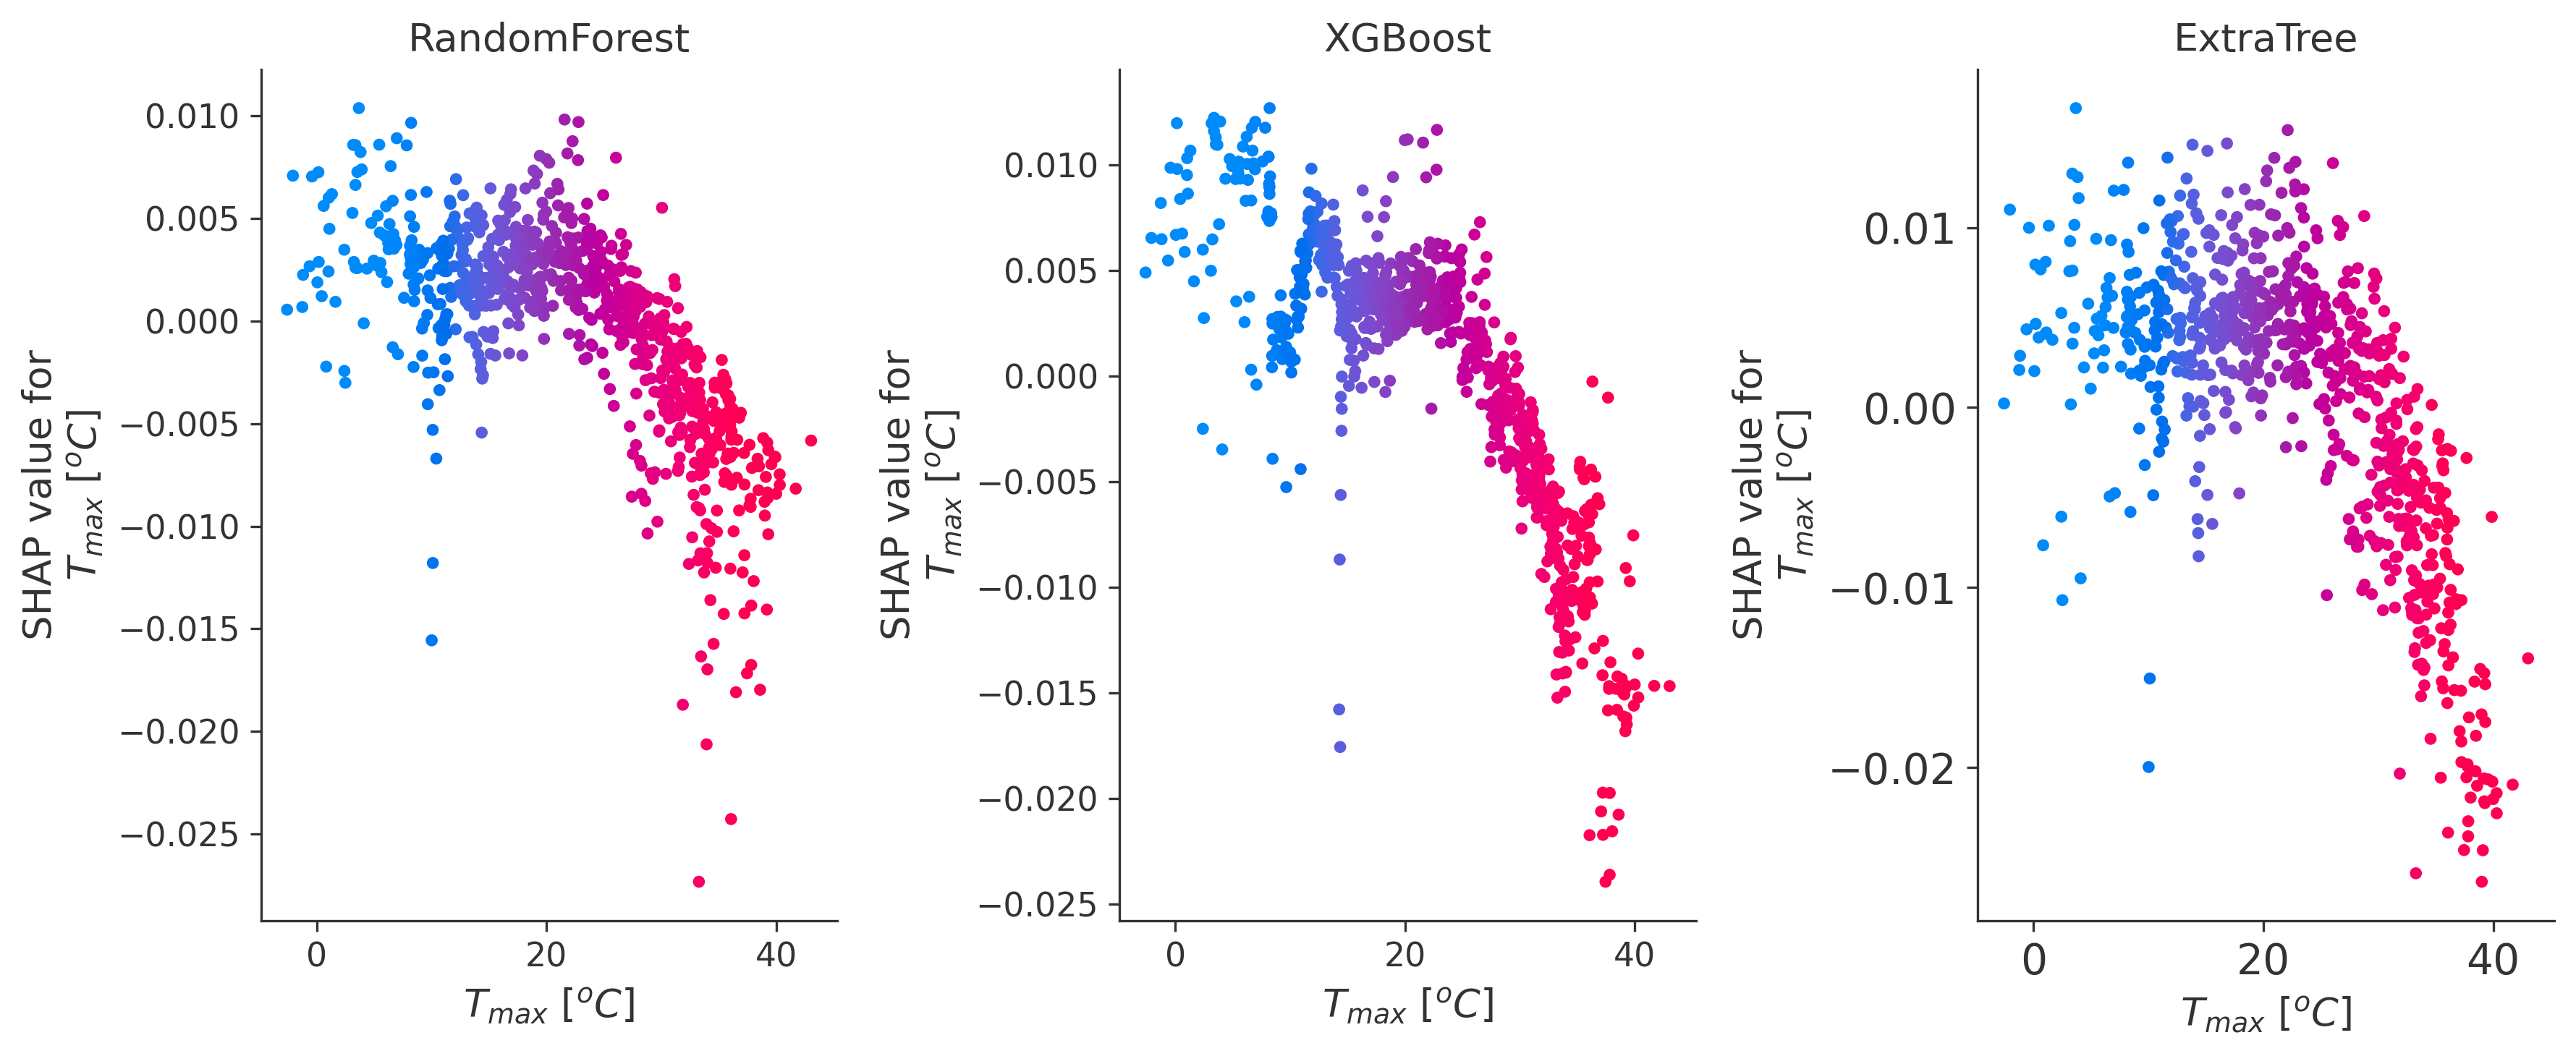

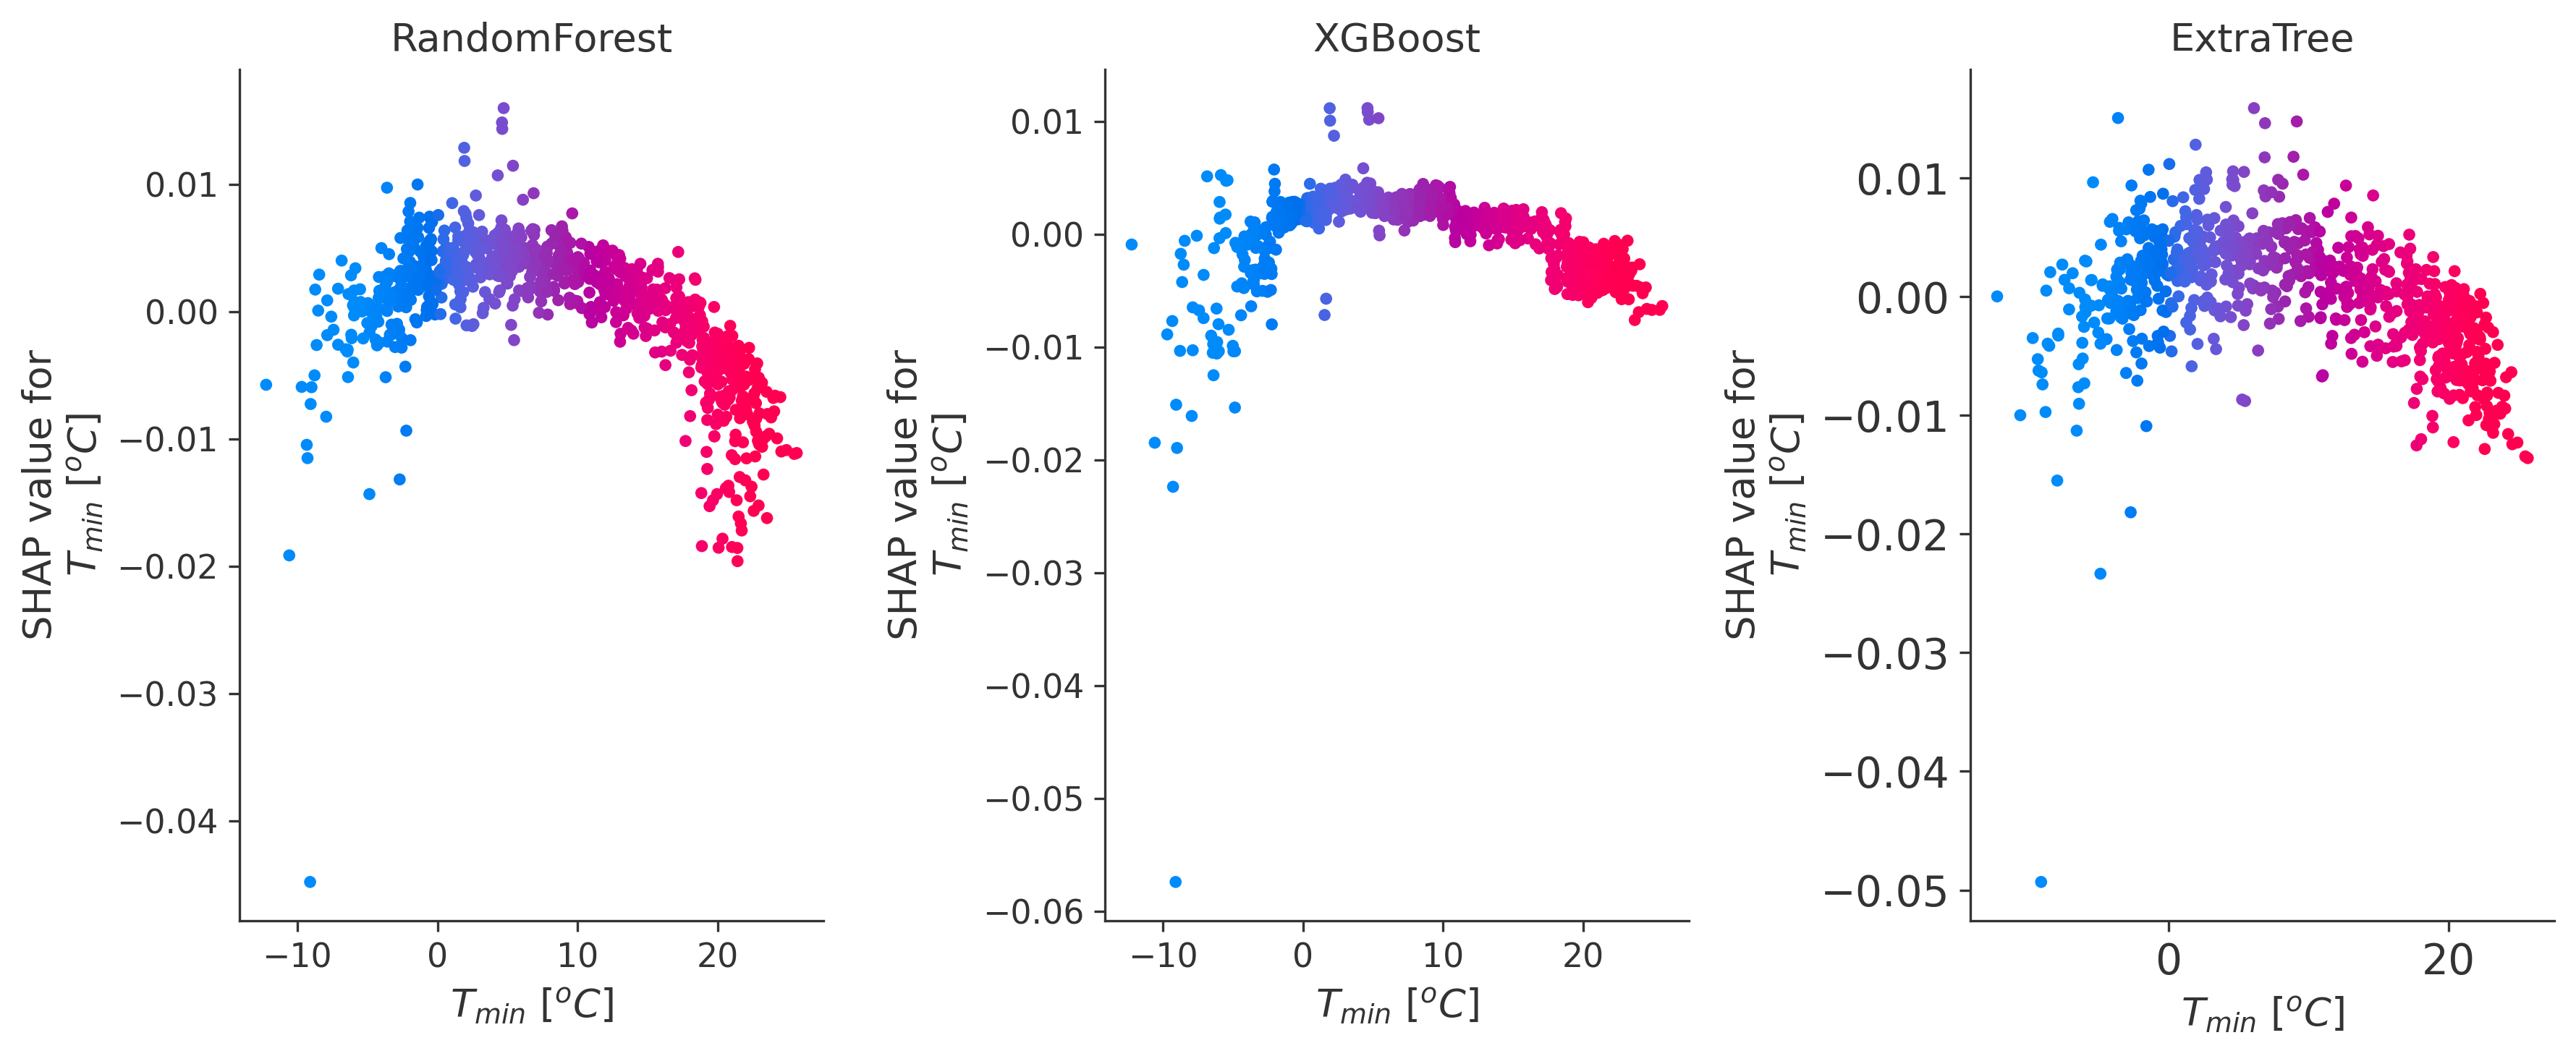

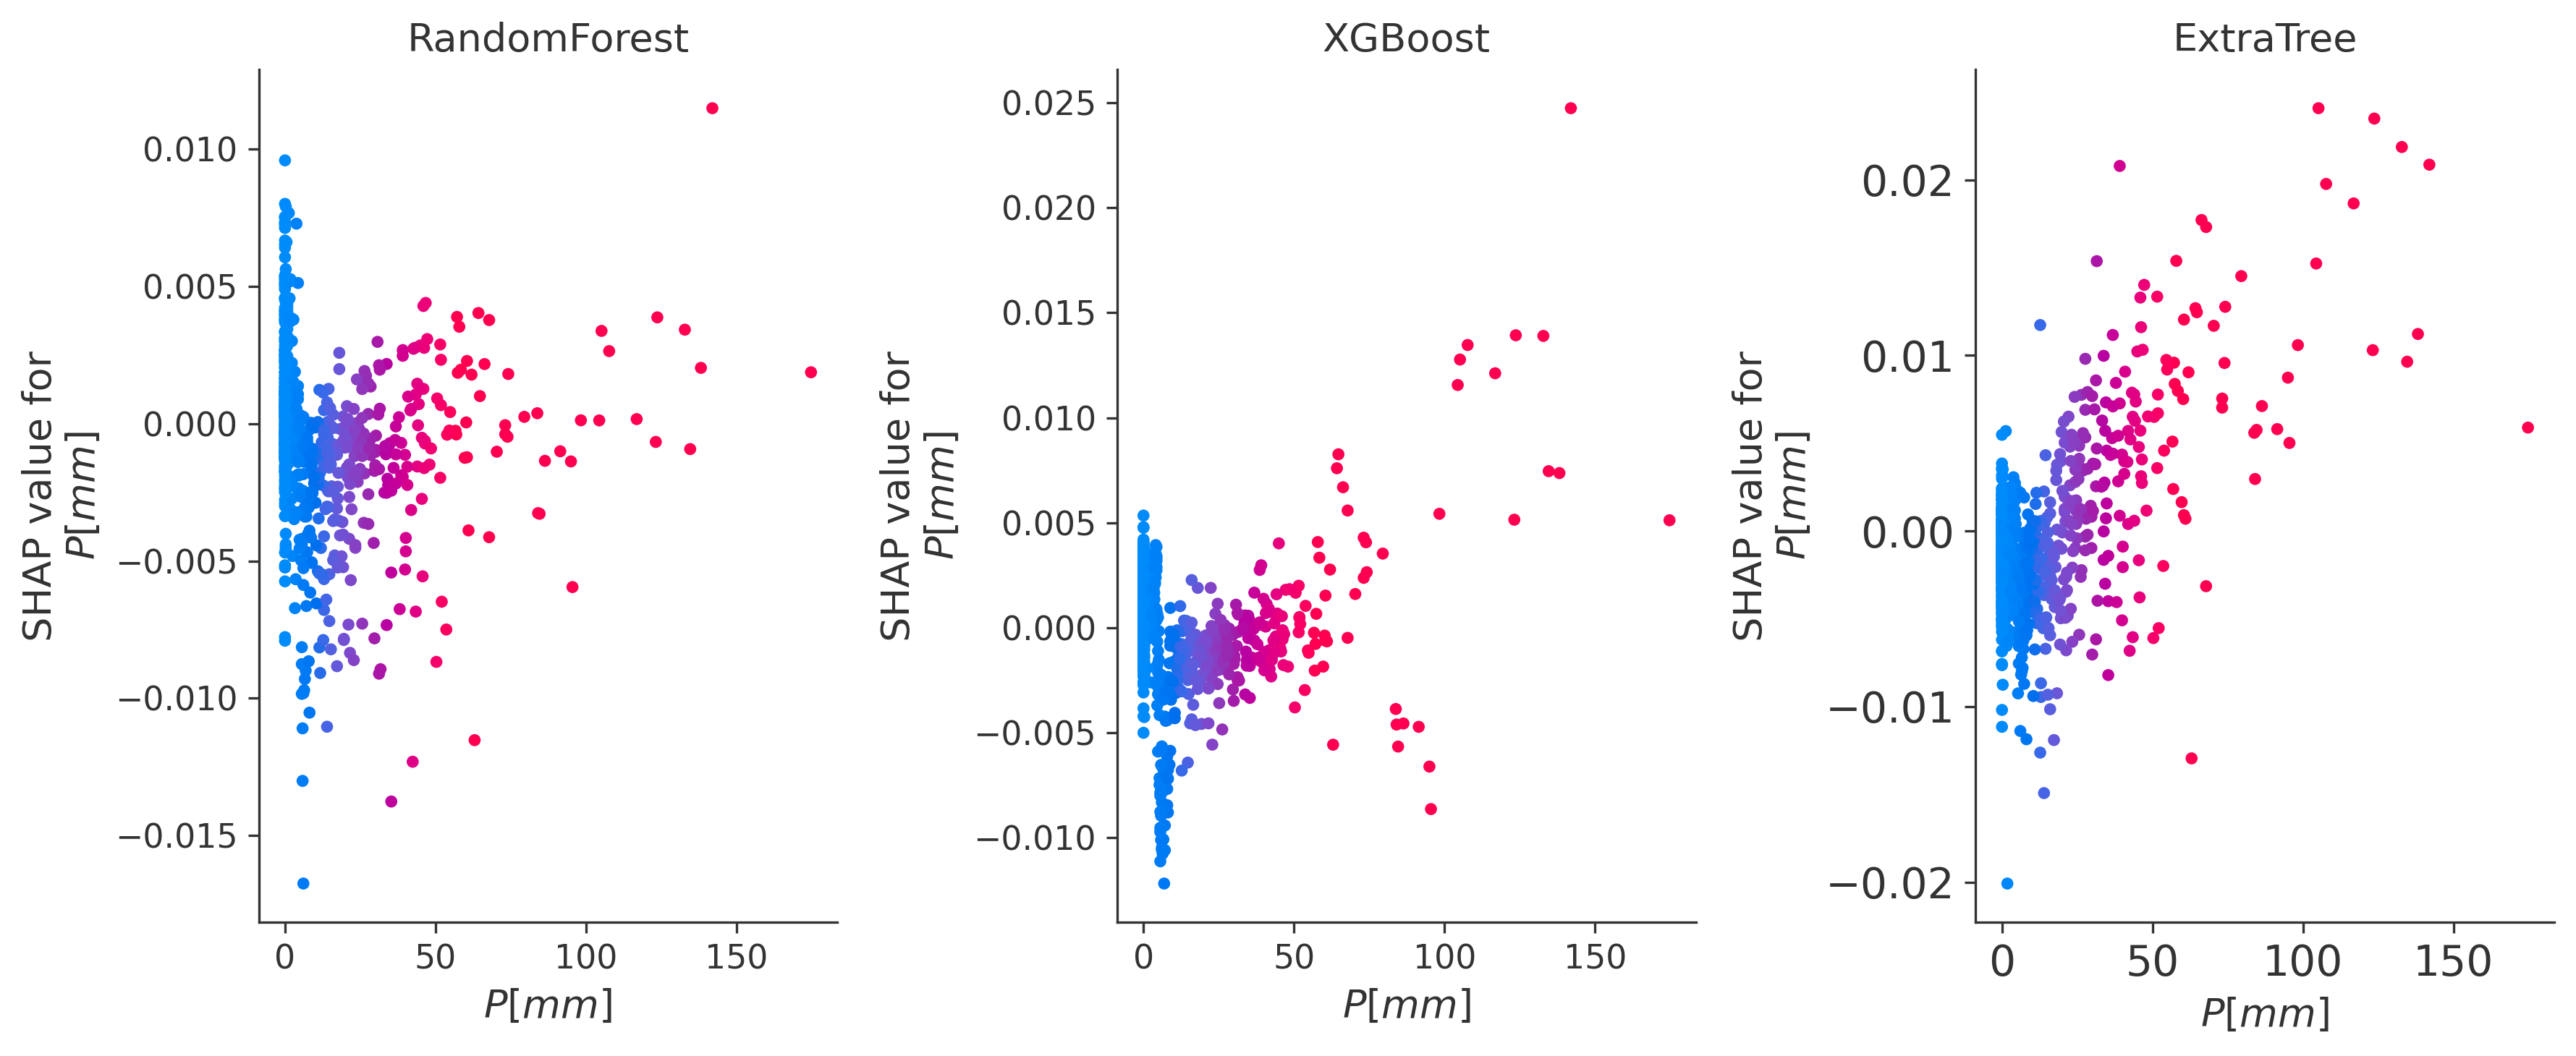

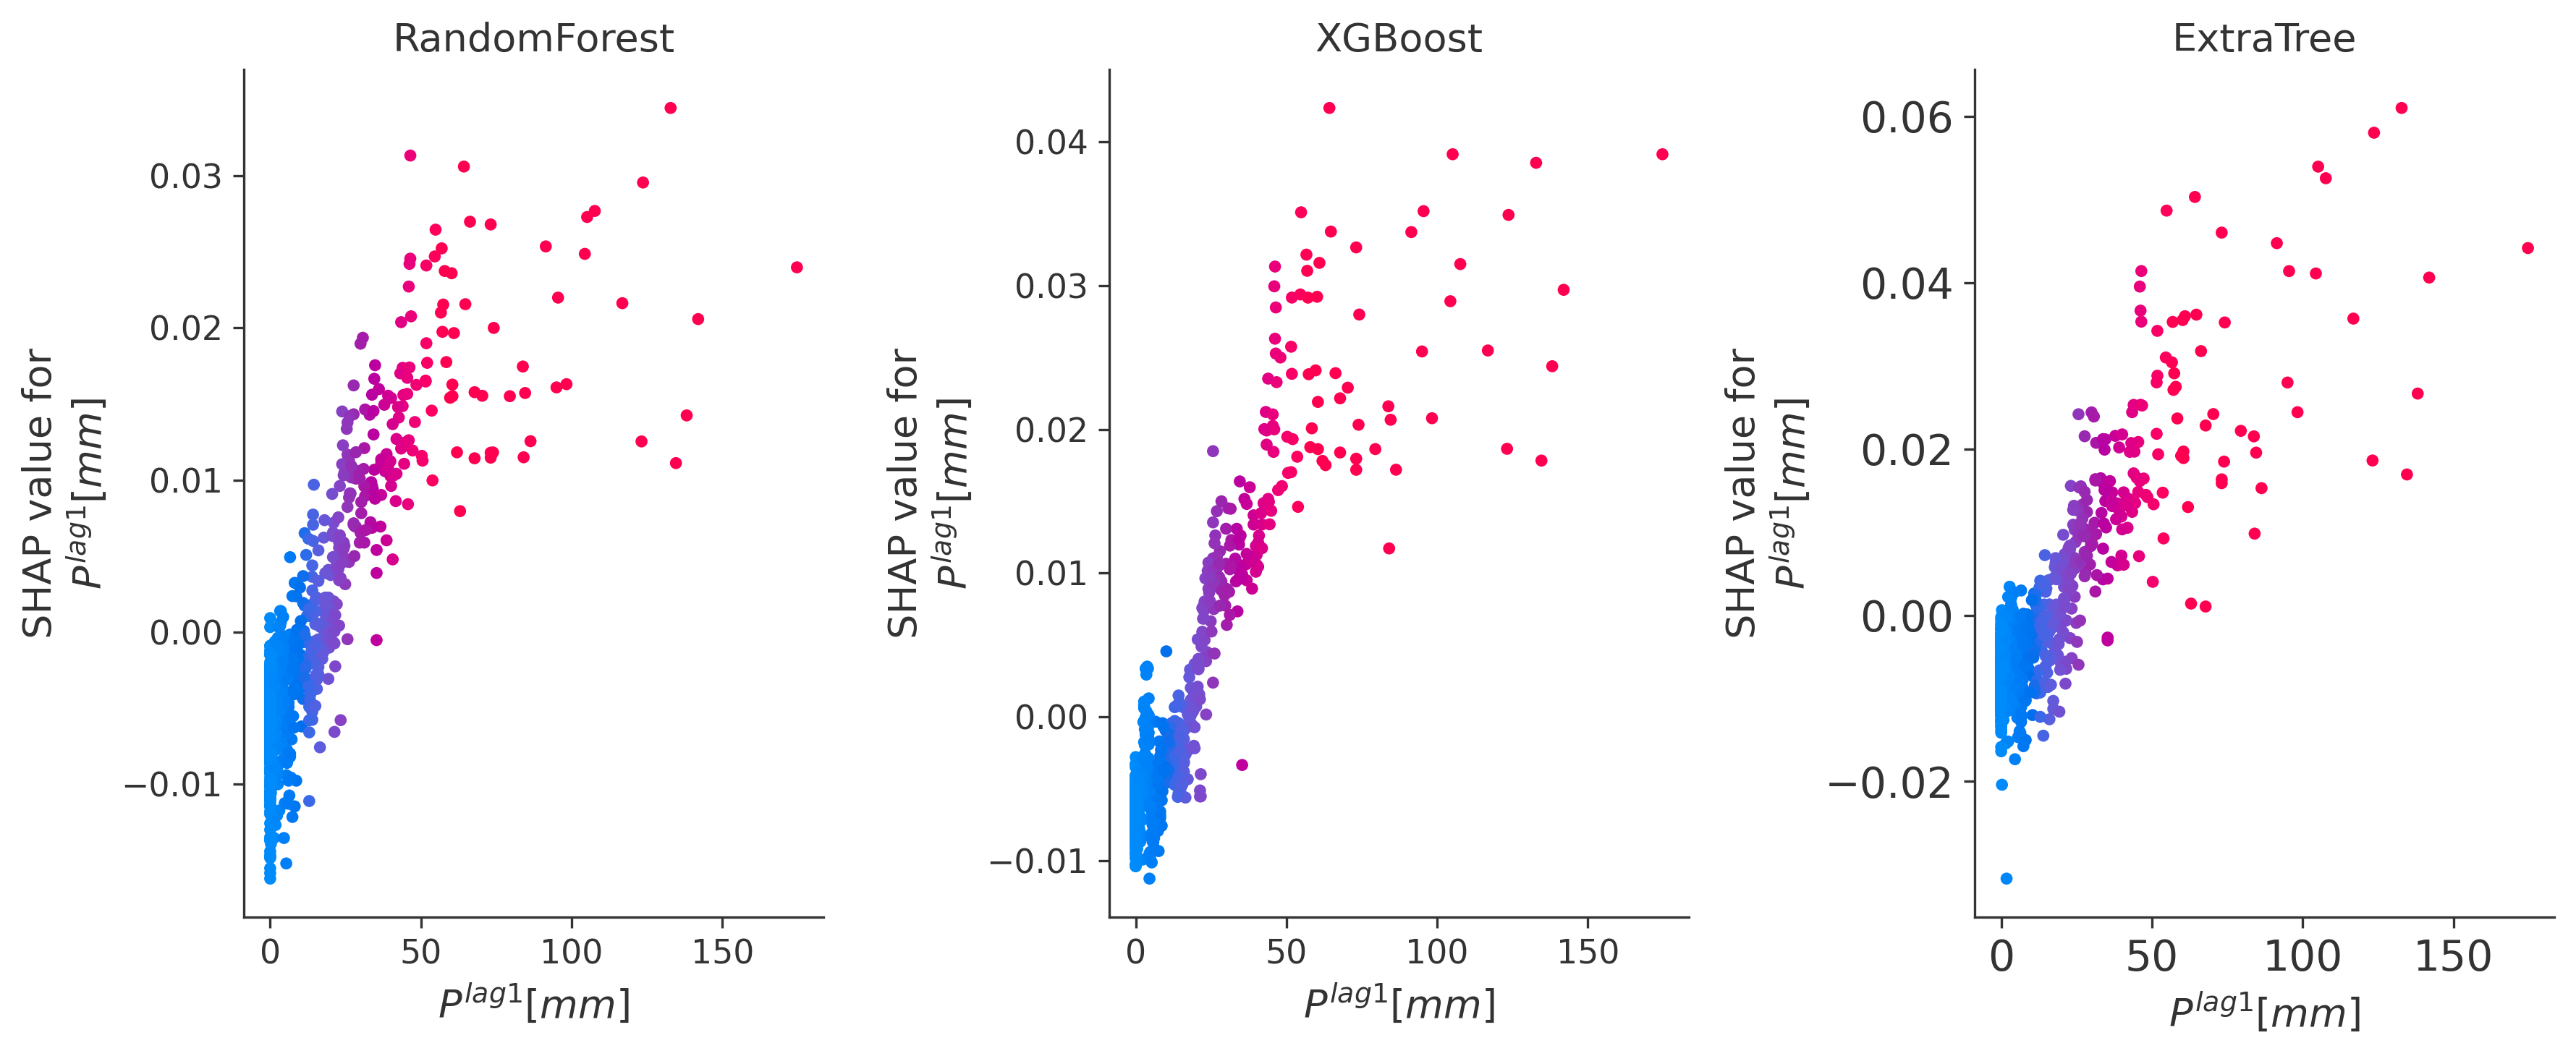

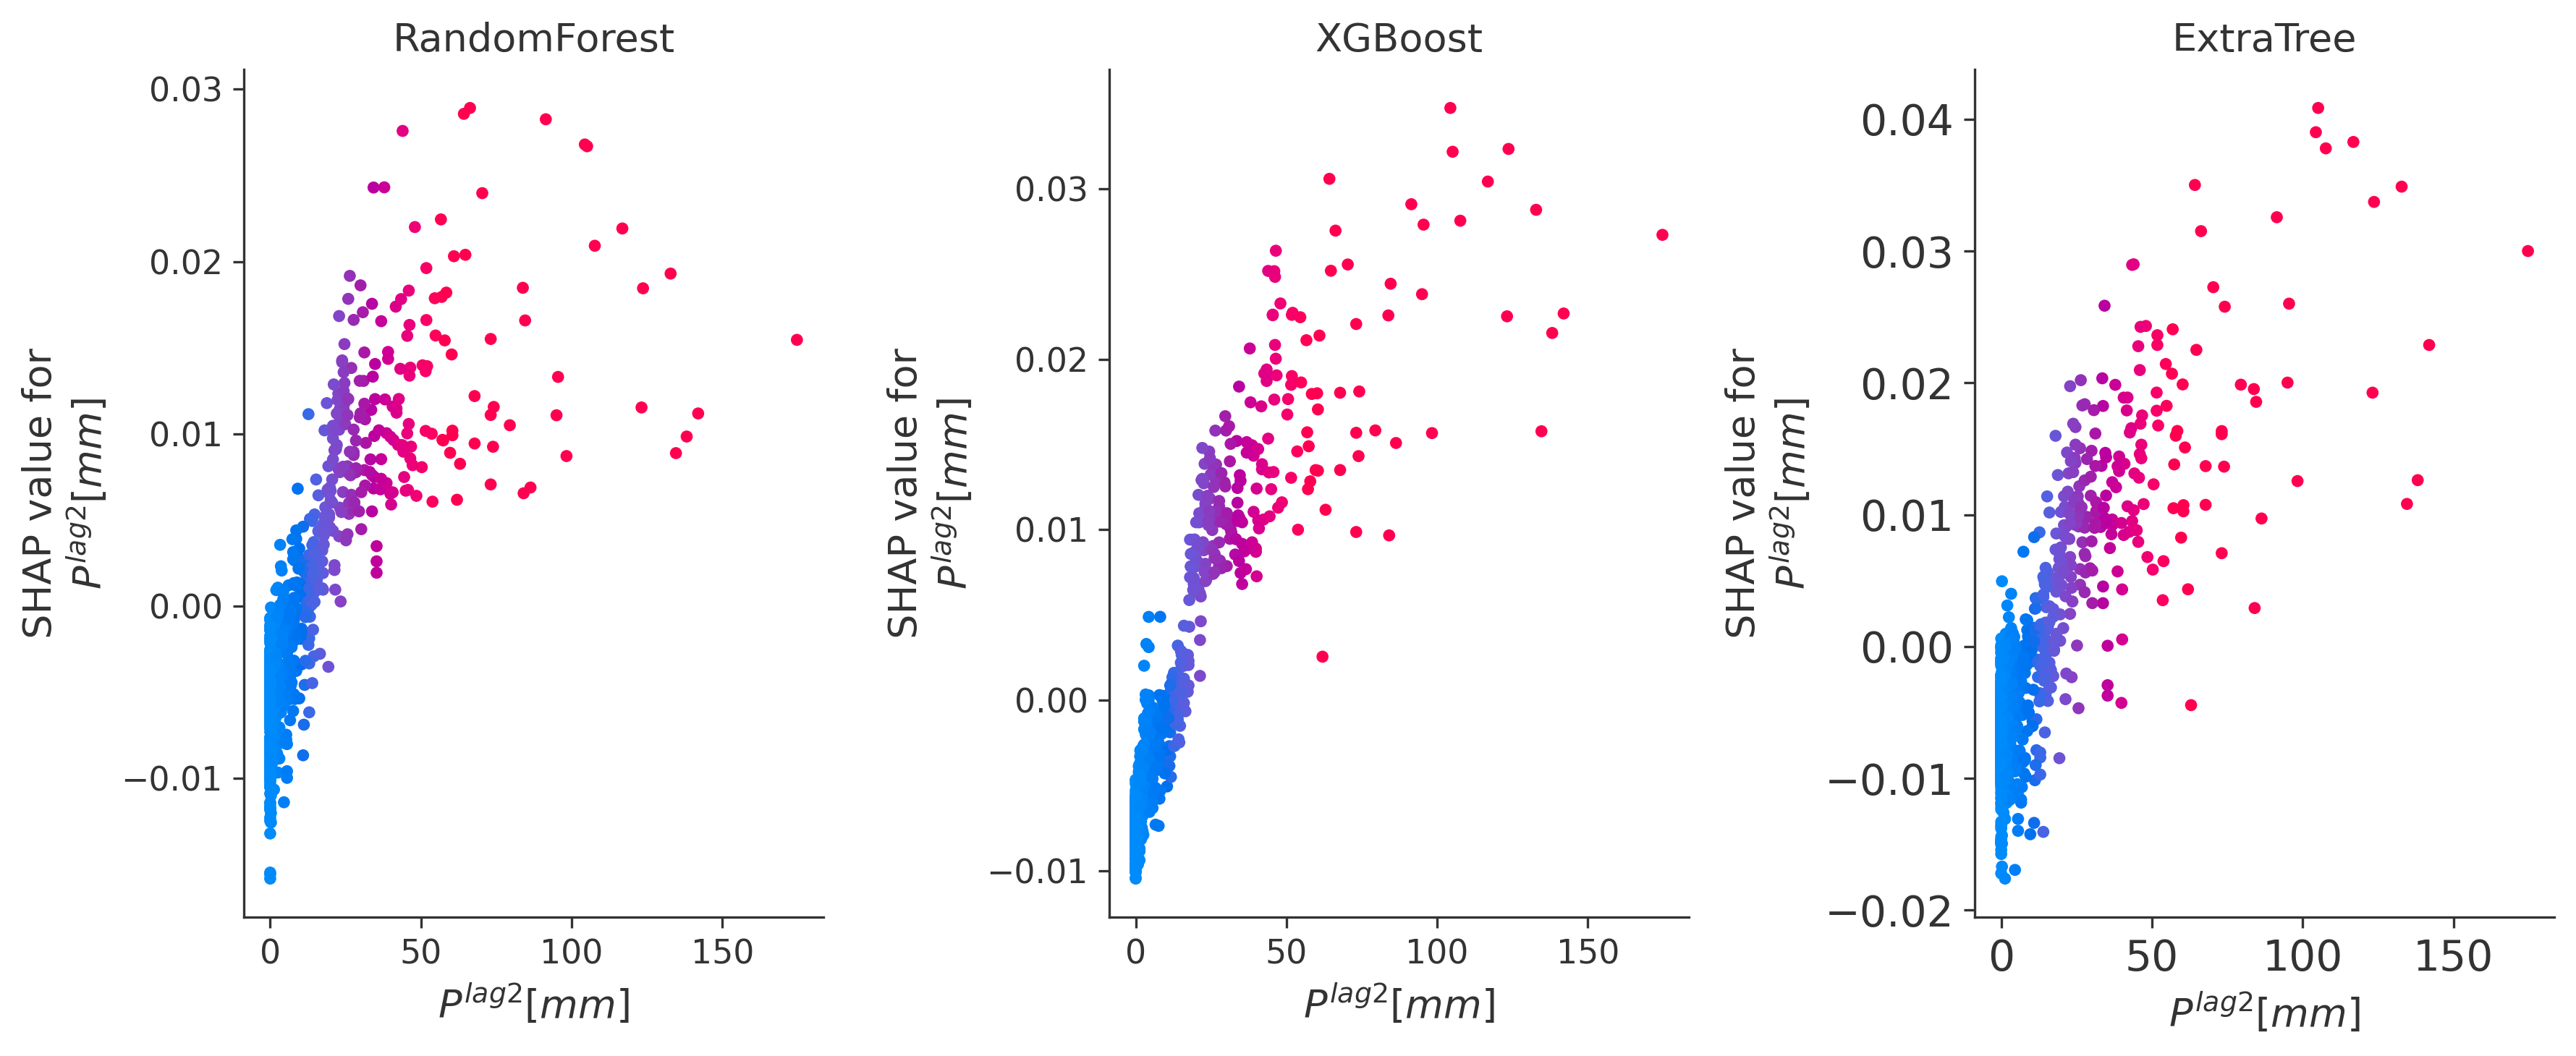

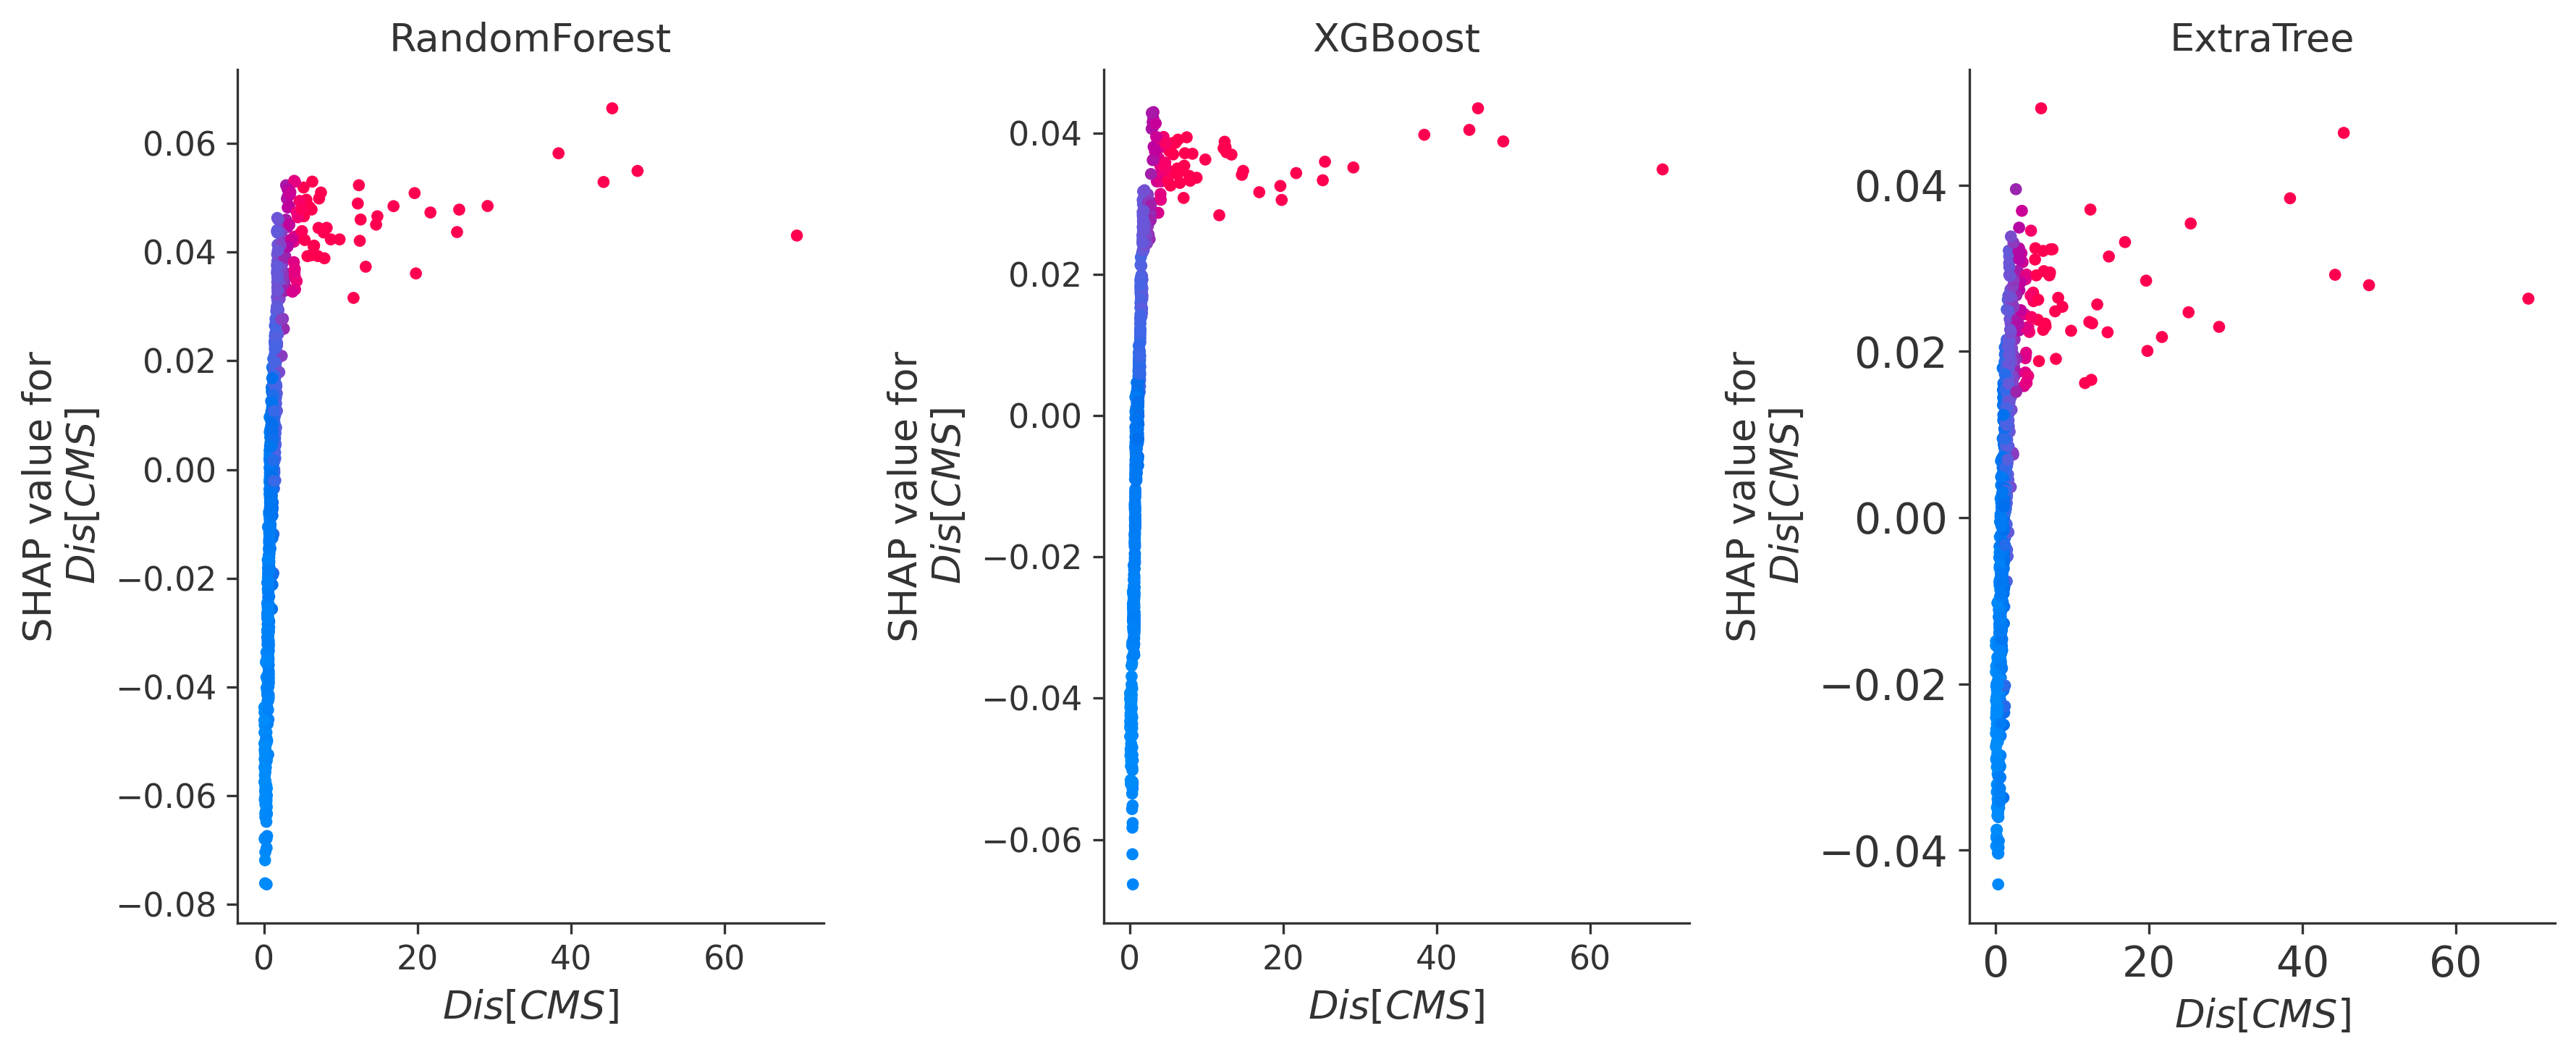

In [78]:
for i in Features:
    fig, ax = plt.subplots(1, 3, figsize=(12, 5), dpi=300)
    for count, j in enumerate(keep):
        shap.dependence_plot(i, keep[j], X, Features, ax=ax[count], show=False,
                             interaction_index=i, title=j)
        #ax[count].title(j, fontsize=14)
        plt.tick_params(labelsize=14)
        # plt.ylabel(labelsize=16)
        plt.tight_layout(pad=1.2)
        plt.savefig(path_to_save+r'/Feature Interaction_' + str(i)+'.jpg',
                    format='jpeg', dpi=300, bbox_inches='tight')


The above feature dependency plot is to be improved as we get more data. 

# Load the yearly crop yield and SPEI data

In [89]:
current_directory = os.getcwd()
file_location = r'/Inputs/Lake Creek Crop Yield Data.xlsx'

crop_yield = pd.read_excel(
    current_directory+file_location, engine="openpyxl", sheet_name=None)
crop_yield.keys()


dict_keys(['Lake Wheat Acres Planted', 'Caddo County Wheat Yield'])

In [90]:
crop_yield = crop_yield['Caddo County Wheat Yield'].sort_values(by = 'Year').set_index("Year")
crop_yield

bu/ac *     t/ha  Caddo Estimated Acres  Caddo Estimated Hectare
Year                                                                  
2005     31.7  2.13341                10651.2              4312.226721
2006     23.6  1.58828                 7929.6              3210.364372
2007     25.0  1.68250                 8400.0              3400.809717
2008     39.0  2.62470                13104.0              5305.263158
2009     16.0  1.07680                 5376.0              2176.518219
2010     31.5  2.11995                10584.0              4285.020243
2011     20.0  1.34600                 6720.0              2720.647773
2012     38.3  2.57759                12868.8              5210.040486
2013     34.8  2.34204                11692.8              4733.927126
2014     23.8  1.60174                 7996.8              3237.570850
2015     27.9  1.87767                 9374.4              3795.303644
2016     35.3  2.37569                11860.8              4801.943320
2017     29.9  2.01227                10046.4              4067.368421
2018     32.8  2.20744                11020.8              4461.862348
2019     40.0  2.69200                13440.0              5441.295547
2020     42.8  2.88044                14380.8              5822.186235

In [91]:
current_directory = os.getcwd()
file_location = r'/Inputs/caddo_SPEI.xlsx'

spei = pd.read_excel(
    current_directory+file_location, engine="openpyxl", sheet_name="spei12")

spei_yearly = spei.sort_values(by = 'Years').set_index("Years")
spei_yearly["SPEI_Avg"] = spei_yearly.median(axis=1)

spei_yearly

January  February     March     April       May      June      July  \
Years                                                                         
2005   0.692891  0.658830  0.626736  0.623681  0.386359  0.185556 -0.754535   
2006  -1.189809 -0.743368 -0.715544 -0.898656 -1.287888 -1.635249 -1.519577   
2007  -1.000719 -1.382129 -1.272528 -0.858911 -0.372118 -0.032010  0.077754   
2008   0.319644  0.276725  0.311596  0.260692 -0.099689 -0.784707 -1.026468   
2009  -0.962900 -1.028821 -1.039983 -1.196946 -0.933294 -1.163769 -1.099613   
2010  -0.518602 -0.280066 -0.234259 -0.191034 -0.470581 -0.683458 -0.423537   
2011   0.507130  0.357049  0.320285  0.207243  0.243664 -0.127219 -0.822131   
2012  -0.529808 -0.490832 -0.436625 -0.204984 -0.260985 -0.050872  1.017498   
2013   1.358892  1.357672  1.359228  1.401475  1.443698  1.529206  0.911806   
2014  -0.438112 -0.437463 -0.353085 -0.522718 -0.640600 -0.726405 -0.694243   
2015  -0.346815 -0.392025 -0.400786 -0.237056  0.244486  0.092622 -0.154837   
2016  -0.183112 -0.280313 -0.290039 -0.324410 -0.922419  0.344178  1.134106   
2017   1.855559  1.859770  1.836118  1.837537  1.837246  1.684725  1.455869   
2018   0.364469  0.396648  0.393494  0.366928  0.301151  0.163160  0.665139   
2019   1.450995  1.447438  1.478213  1.516896  1.634343  1.754414  1.838445   
2020   1.564285  1.543043  1.527136  1.519278  1.484406  1.519161  0.898944   

         August  September   October  November  December  SPEI_Avg  
Years                                                               
2005  -0.752786  -0.646098 -0.745894 -1.045667 -0.969127 -0.230271  
2006  -1.558175  -1.486743 -1.408062 -1.386774 -1.335303 -1.361039  
2007   0.183817   0.277200  0.255452  0.279254  0.353062  0.022872  
2008  -1.032757  -0.944029 -0.935555 -0.980360 -1.005906 -0.860131  
2009  -1.171727  -0.981808 -0.776066 -0.769442 -0.644756 -1.005315  
2010   0.534147   0.543563  0.405034  0.480806  0.504638 -0.212647  
2011  -1.120246  -1.170623 -1.086493 -0.679472 -0.544386 -0.335802  
2012   1.122330   1.461492  1.455568  1.333444  1.356779  0.483313  
2013  -0.116280  -1.053393 -1.024995 -0.913452 -0.808401  1.134739  
2014  -0.619805  -0.435504 -0.520823 -0.468925 -0.166474 -0.494874  
2015  -0.274014  -0.164746 -0.063934 -0.028770 -0.226820 -0.195783  
2016   1.600800   1.769062  1.738976  1.810354  1.842676  0.739142  
2017   0.872419   0.622366  0.688829  0.476839  0.536120  1.570297  
2018   1.158093   1.317079  1.360053  1.395971  1.448067  0.530893  
2019   1.772651   1.597674  1.557198  1.576223  1.594557  1.585390  
2020   0.769669   0.305420  0.305170  0.305529  0.402229  1.191675

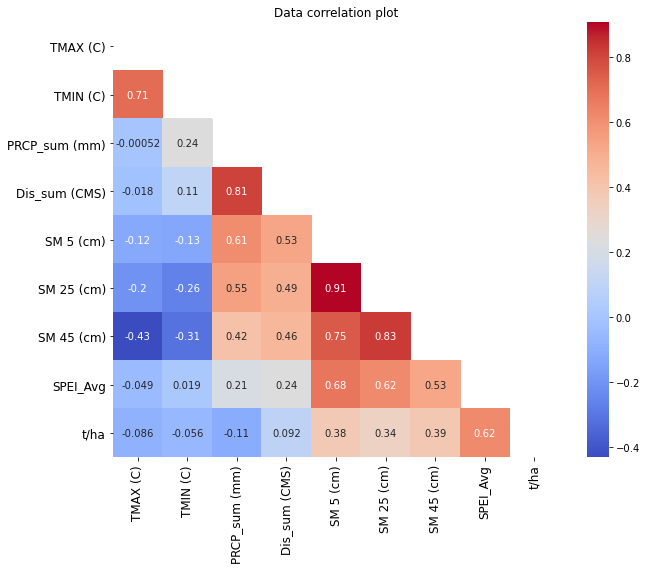

In [97]:
# Resample the temperature
resampled_yearly = df_F108[['TMAX (C)', "TMIN (C)"]].resample('Y').median()
# Resample the Precipitation & Discharge sum
resampled_yearly["PRCP_sum (mm)"] = df_F108["PRCP (mm)"].resample('Y').sum()
resampled_yearly["Dis_sum (CMS)"] = df_F108["CMS"].resample('Y').sum()
# Resample the SM
resampled_SM_yearly = df_F108.iloc[:, 4:].resample('Y').median()
# The transformed precipitation mean and median

df_F108_resampled_yearly = resampled_yearly.merge(resampled_SM_yearly, on='Date', how="inner")

df_F108_resampled_yearly['SPEI_Avg'] = spei_yearly["SPEI_Avg"].values

# df_F108_resampled_yearly['bu/ac *'] = crop_yield['bu/ac *'].values
df_F108_resampled_yearly['t/ha'] = crop_yield['t/ha'].values

corr_plot(df_F108_resampled_yearly, 'Data correlation plot')
